**Aim - Predict the customer churn for a Bank**

**About Dataset**


*  This data set contains details of bank's customers whether the customer left the bank (closed his account) or he continues to be a customer.


*  The target variable is 'Exited' which indicates whether a customer has churned(1) or not (0).



This dataset contains the data of a bank with following columns:

1) RowNumber : Corresponds to the row number.

2) CustomerId : An identifier for each customer.

3) Surname : Surname of the customer.

4) CreditScore : Credit Score of the customer.

5) Geography: The geographic location of the customer.

6) Gender: The gender of the customer.

7) Age: The age of the customer.

8) Tenure: Time period the customer has been a client of the bank.

9) Balance: The account balance of the customer.

10) NumOfProducts: Number of products that a customer has purchased through the bank like loans, credit card, debit card.

11) HasCrCard: Whether the customer has a credit card or not.

12) IsActiveMember: Whether the customer is an active member.

13) EstimatedSalary: Salary of the customer.

14) Exited: Used as a target. 1 if the customer has left the bank or o if customer has not left.

# **Importing required libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,classification_report, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Churn_Modelling.csv')

# **Exploratory Data Analysis**

In [3]:
data.shape

(10000, 14)

In [4]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# Checking Missing values
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
# Checking data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
# Dropping unecessary columns
data.drop(['RowNumber','CustomerId','Surname'],axis = 1, inplace= True)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# **Visualizations**

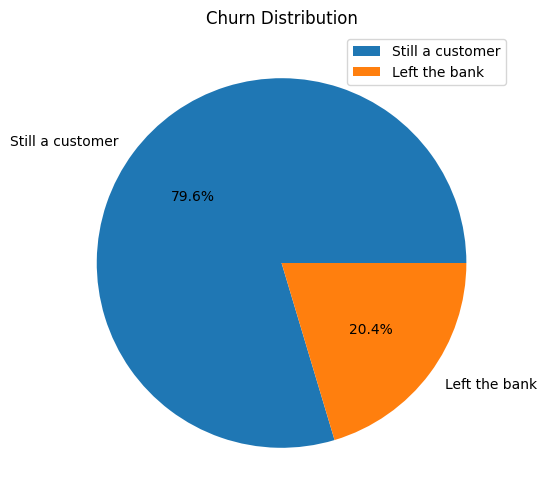

In [8]:
plt.figure(figsize=(8,6))
exit = data['Exited'].value_counts()
label = ['Still a customer', 'Left the bank']
plt.pie(exit, labels = label, autopct = '%1.1f%%')
plt.title('Churn Distribution')
plt.legend()
plt.show()

In [9]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

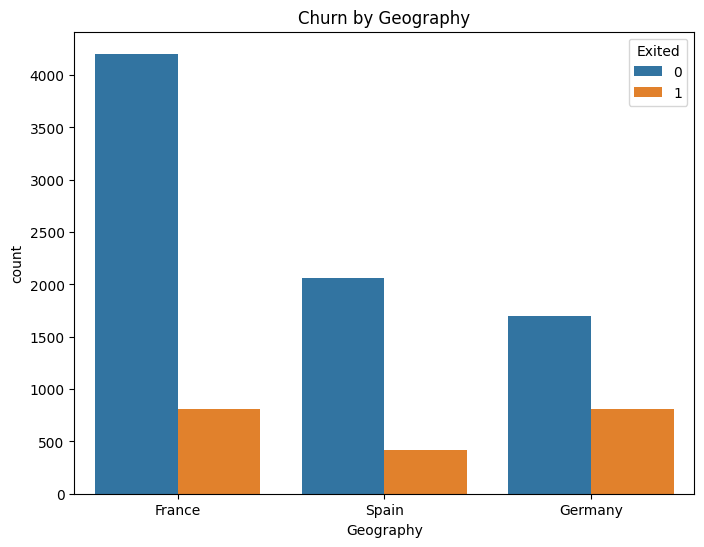

In [10]:
# Churn by geography
plt.figure(figsize=(8,6))
sns.countplot(x='Geography', hue='Exited', data = data)
plt.title('Churn by Geography')
plt.show()

The churn rate varies across different countries.Germany and France has the higher churn rate, followed Spain. This suggest that geographic location may impact customer churn.

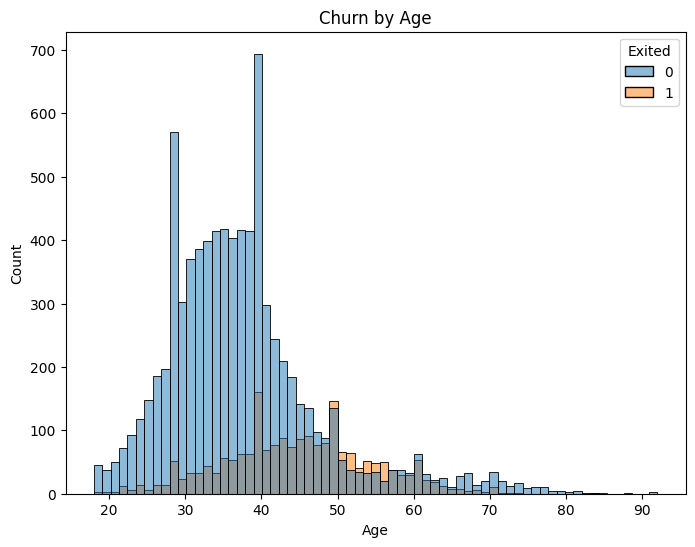

In [11]:
# Churn by age
plt.figure(figsize=(8,6))
sns.histplot(x='Age', hue='Exited', data=data)
plt.title('Churn by Age')
plt.show()

The highest churn rate is observed between the 50 t0 60 age group, this implies that older customer are more likely to churn, while younger customers are more likely to stay with the bank.

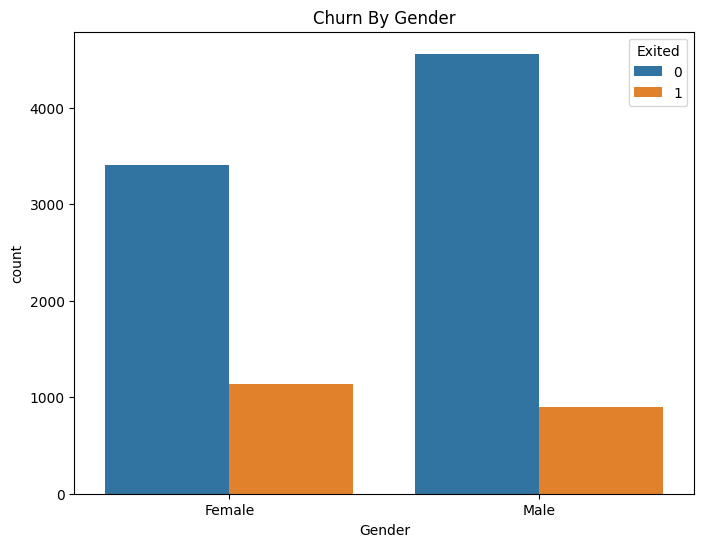

In [12]:
# Churn by gender
plt.figure(figsize=(8,6))
sns.countplot(x='Gender', hue='Exited', data=data)
plt.title('Churn By Gender')
plt.show()

Here we can observe that the churn rate is higher for female customers compared to male customers. This indicates that gender may play a role in customer churn.

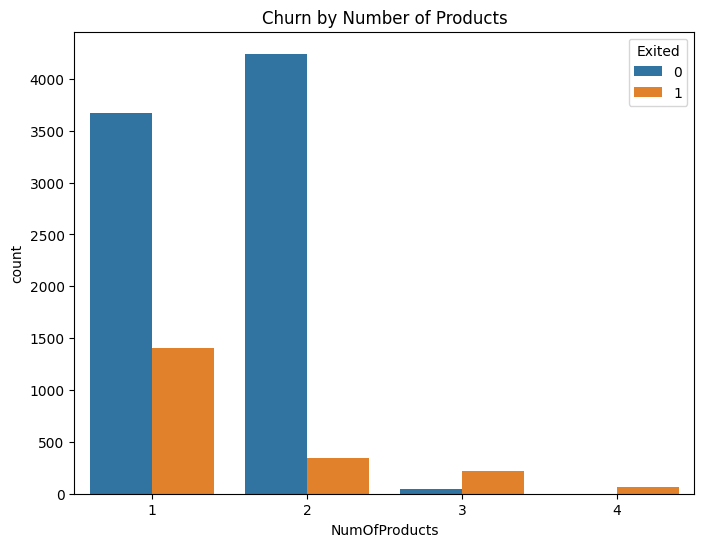

In [13]:
# Churn by Number of Products
plt.figure(figsize=(8,6))
sns.countplot(x='NumOfProducts', hue='Exited', data=data)
plt.title('Churn by Number of Products')
plt.show()

Customers with fewer products are more like;y to churn, while those with more products have lower churn rate.

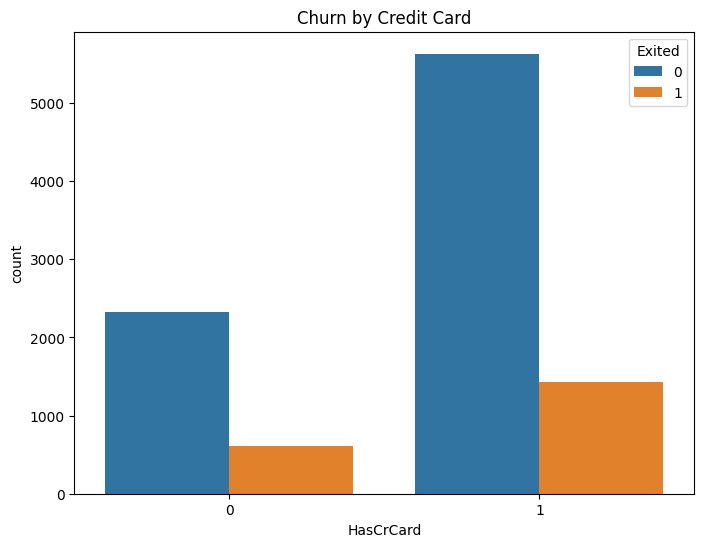

In [14]:
# Churn by credit card
plt.figure(figsize=(8,6))
sns.countplot(x='HasCrCard', hue='Exited', data=data)
plt.title('Churn by Credit Card')
plt.show()

The churn rate appears to be more for customers with credit card.

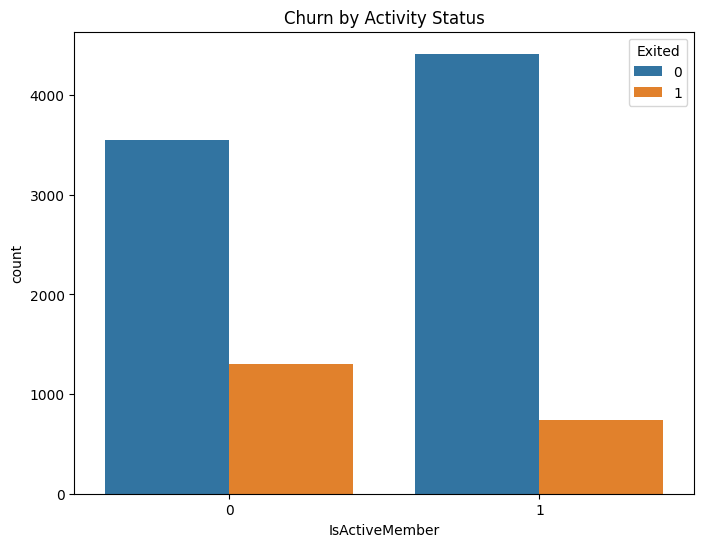

In [15]:
# Churn by activity status
plt.figure(figsize=(8,6))
sns.countplot(x='IsActiveMember', hue='Exited', data=data)
plt.title('Churn by Activity Status')
plt.show()

Active members appear to have lower churn rate compared to inactive members.

# **Label Encoding**

In [16]:
le = LabelEncoder()
data['Geography'] = le.fit_transform(data['Geography'])
data['Gender'] = le.fit_transform(data['Gender'])
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [17]:
# Checking data types after label encoding
data.dtypes

CreditScore          int64
Geography            int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [18]:
# Checking correlation
data.corr()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,0.007888,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Geography,0.007888,1.000000,0.004719,0.022812,0.003739,0.069408,0.003972,-0.008523,0.006724,-0.001369,0.035943
Gender,-0.002857,0.004719,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512
Age,-0.003965,0.022812,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,0.003739,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.069408,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,0.003972,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.008523,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.006724,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.001369,-0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


# **HeatMap to show correlation**

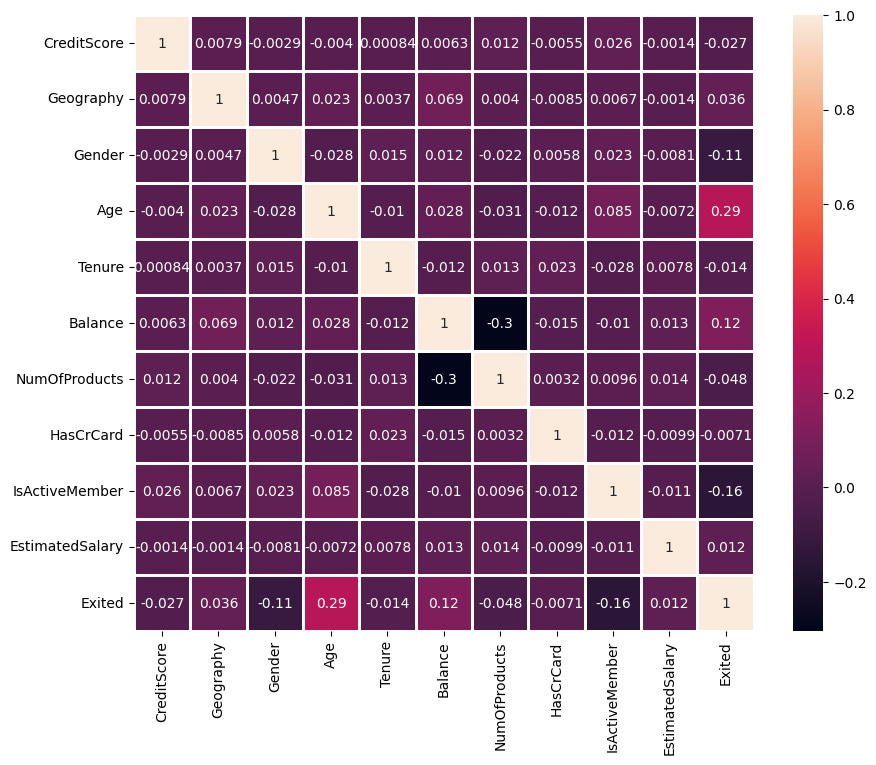

In [19]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True, linewidths=1)
plt.show()

# **Splitting the data**

In [20]:
x = data.iloc[:,:-1]
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64
9996,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,709,0,0,36,7,0.00,1,0,1,42085.58
9998,772,1,1,42,3,75075.31,2,1,0,92888.52


In [21]:
y = data.iloc[:,-1]
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

# **Normalisation**

In [22]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[0.538     , 0.        , 0.        , ..., 1.        , 1.        ,
        0.50673489],
       [0.516     , 1.        , 0.        , ..., 0.        , 1.        ,
        0.56270874],
       [0.304     , 0.        , 0.        , ..., 1.        , 0.        ,
        0.56965435],
       ...,
       [0.718     , 0.        , 0.        , ..., 0.        , 1.        ,
        0.21039009],
       [0.844     , 0.5       , 1.        , ..., 1.        , 0.        ,
        0.46442905],
       [0.884     , 0.        , 0.        , ..., 1.        , 0.        ,
        0.19091423]])

# **Splitting data to training and testing set**

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y, test_size=0.2, random_state=42)

# **Model Building**

K-Nearest Neighbours.

accuracy1: 0.824
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      1607
           1       0.60      0.33      0.42       393

    accuracy                           0.82      2000
   macro avg       0.72      0.64      0.66      2000
weighted avg       0.80      0.82      0.80      2000



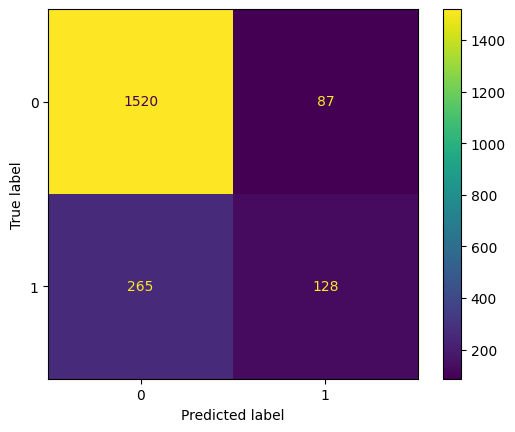

In [24]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
accuracy1 = accuracy_score(y_test, y_pred)
print('accuracy1:', accuracy1)
print(classification_report(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

Naive Bayes

accuracy2: 0.8285
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1607
           1       0.68      0.24      0.35       393

    accuracy                           0.83      2000
   macro avg       0.76      0.61      0.63      2000
weighted avg       0.81      0.83      0.79      2000



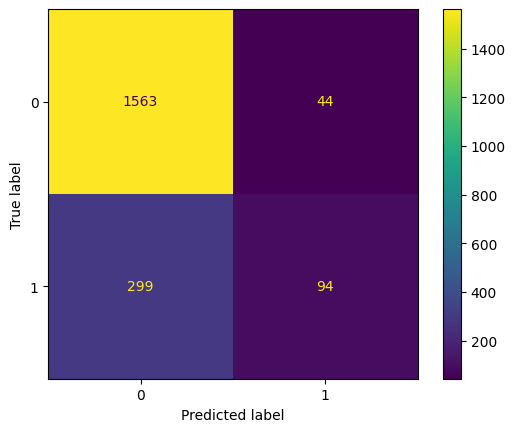

In [25]:
nb = GaussianNB()
nb.fit(x_train,y_train)
y_pred = nb.predict(x_test)
accuracy2 = accuracy_score(y_test, y_pred)
print('accuracy2:', accuracy2)
print(classification_report(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

Support Vector Classifier

accuracy3: 0.853
              precision    recall  f1-score   support

           0       0.86      0.98      0.91      1607
           1       0.83      0.32      0.46       393

    accuracy                           0.85      2000
   macro avg       0.84      0.65      0.69      2000
weighted avg       0.85      0.85      0.83      2000



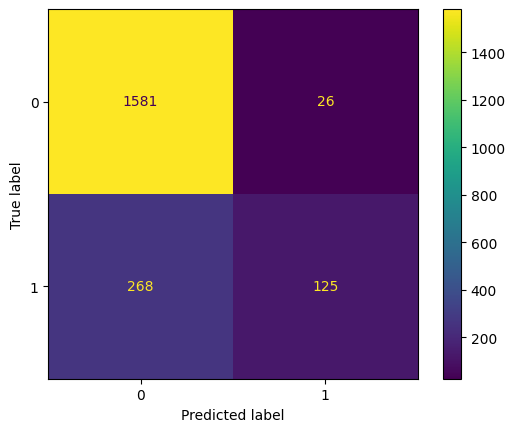

In [26]:
sv = SVC()
sv.fit(x_train,y_train)
y_pred= sv.predict(x_test)
accuracy3 = accuracy_score(y_test, y_pred)
print('accuracy3:', accuracy3)
print(classification_report(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

Decision Tree Classifier

accuracy4: 0.7835
              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1607
           1       0.45      0.51      0.48       393

    accuracy                           0.78      2000
   macro avg       0.67      0.68      0.67      2000
weighted avg       0.79      0.78      0.79      2000



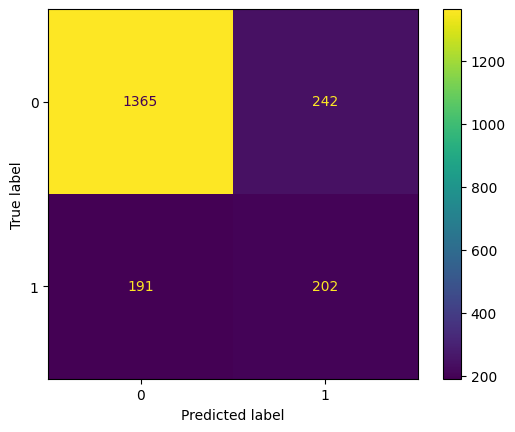

In [27]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
accuracy4 = accuracy_score(y_test, y_pred)
print('accuracy4:', accuracy4)
print(classification_report(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

Random Forest Classifier

accuracy5: 0.863
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.46      0.57       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



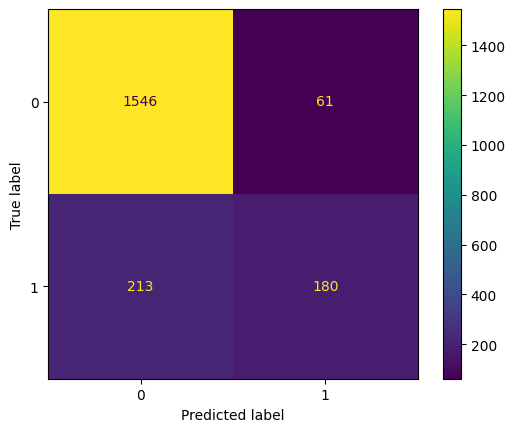

In [28]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
accuracy5 = accuracy_score(y_test, y_pred)
print('accuracy5:', accuracy5)
print(classification_report(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

Adaboost Classifier

accuracy6: 0.853
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1607
           1       0.68      0.48      0.56       393

    accuracy                           0.85      2000
   macro avg       0.78      0.71      0.74      2000
weighted avg       0.84      0.85      0.84      2000

accuracy6: 0.853


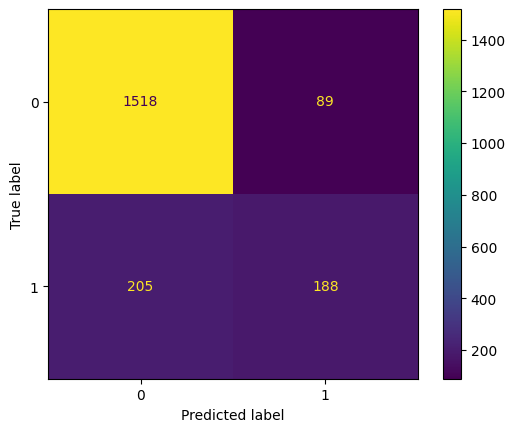

In [29]:
ad = AdaBoostClassifier()
ad.fit(x_train,y_train)
y_pred = ad.predict(x_test)
accuracy6 = accuracy_score(y_test, y_pred)
print('accuracy6:', accuracy6)
print(classification_report(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
accuracy6 = accuracy_score(y_test, y_pred)
print('accuracy6:', accuracy6)

In [30]:
df = pd.DataFrame({'Model':['KNN','NAIVE BAYES','SVC','DECISION','RANDOM','ADABOOST'],'Accuracy':[accuracy1,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6]})
df['Accuracy'] = df['Accuracy']*100
df

,Model,Accuracy
0,KNN,82.40
1,NAIVE BAYES,82.85
2,SVC,85.30
3,DECISION,78.35
4,RANDOM,86.30
5,ADABOOST,85.30


# **Plotting Accuracy of Models**

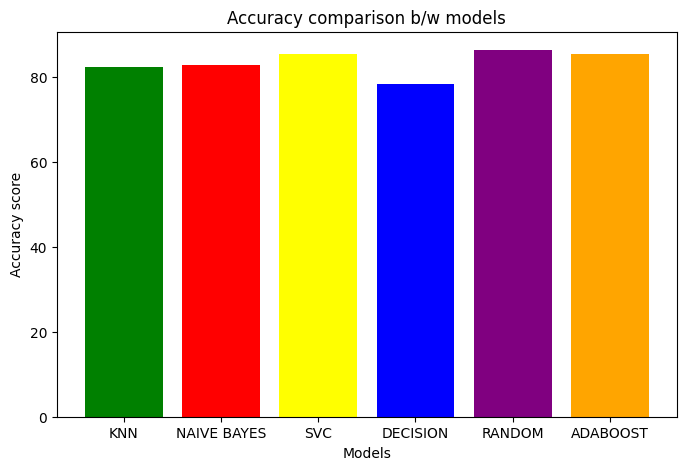

In [31]:
plt.figure(figsize=(8,5))
Models = df['Model']
Accurate = df['Accuracy']
plt.bar(Models,Accurate,color=['green','red','yellow','blue','purple','orange'])
plt.title('Accuracy comparison b/w models')
plt.xlabel('Models')
plt.ylabel('Accuracy score')
plt.show()

From the chart we can see that that the accuracy score of Random Forest and Adaboost are higher.

# **Conclusion -** By comparing the performance measures of different algorithms the most accurate model is using Random Forest and Adaboost Classifier.

Predicting new values

In [32]:
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64
9996,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,709,0,0,36,7,0.00,1,0,1,42085.58
9998,772,1,1,42,3,75075.31,2,1,0,92888.52


In [33]:
y_new = rf.predict(scaler.transform([[900,0,1,32,7,45000,2,0,1,6000]]))
if y_new == 0:
 print('Continues to be a customer')
else:
  print('Left the bank')

Continues to be a customer
